# Civics Problem Set #2
    Author: Lucy Kang - lk1854
    
## Goal: Find correlation between city size, city density, and CO2 emissions

In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
pl.style.use('fivethirtyeight')
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#open census data
census = pd.read_csv('R11068625_SL050.csv')
census.head()

,Area Name-Legal/Statistical Area Description,Qualifying Name,Area (Land),Area (Water),Summary Level,Geographic Component,Region,Division,FIPS,State (FIPS),County,TotalPopulation,TotalPopulation.1,Population Density (per sq. mile),Area (Land).1,Area Total,Area (Land).2,Area (Water).1
0,Autauga County,"Autauga County, Alabama",1543550050,21959029,50,0,3,6,1001,1,1,43671,43671,73.27742,595.968043,604.4465,595.9680,8.478429
1,Baldwin County,"Baldwin County, Alabama",4134518782,1115203109,50,0,3,6,1003,1,3,140415,140415,87.96021,1596.346695,2026.9290,1596.3470,430.582300
2,Barbour County,"Barbour County, Alabama",2291889572,50799584,50,0,3,6,1005,1,5,29038,29038,32.81487,884.903584,904.5174,884.9036,19.613830
3,Bibb County,"Bibb County, Alabama",1613627425,8124469,50,0,3,6,1007,1,7,20826,20826,33.42723,623.025046,626.1619,623.0250,3.136875
4,Blount County,"Blount County, Alabama",1672057889,12998871,50,0,3,6,1009,1,9,51024,51024,79.03527,645.585175,650.6041,645.5852,5.018892


In [3]:
print sum(census['TotalPopulation'])

285230516


In [4]:
census.columns

Index([u'Area Name-Legal/Statistical Area Description', u'Qualifying Name',
       u'Area (Land)', u'Area (Water)', u'Summary Level',
       u'Geographic Component', u'Region', u'Division', u'FIPS',
       u'State (FIPS)', u'County', u'TotalPopulation', u'TotalPopulation.1',
       u'Population Density (per sq. mile)', u'Area (Land).1', u'Area Total',
       u'Area (Land).2', u'Area (Water).1'],
      dtype='object')

In [5]:
c = census[['Qualifying Name','FIPS','TotalPopulation','Population Density (per sq. mile)', 'Area Total']]
c.head()

,Qualifying Name,FIPS,TotalPopulation,Population Density (per sq. mile),Area Total
0,"Autauga County, Alabama",1001,43671,73.27742,604.4465
1,"Baldwin County, Alabama",1003,140415,87.96021,2026.9290
2,"Barbour County, Alabama",1005,29038,32.81487,904.5174
3,"Bibb County, Alabama",1007,20826,33.42723,626.1619
4,"Blount County, Alabama",1009,51024,79.03527,650.6041


In [6]:
#open vulcan data
vulcan = pd.read_csv('CountiesBySector.csv')
vulcan.head()

,State,County,FIPS,TotalEmissions,Unnamed: 4,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad
0,AL,Autauga,1001,0.256167,NaN,0.003001,0.004434,0.010148,0.155508,0.074761,0,0.000976,0.002453,0.004886
1,AL,Baldwin,1003,0.450031,NaN,0.015348,0.011884,0.031948,0.000000,0.278709,0,0.017842,0.044849,0.049451
2,AL,Barbour,1005,0.099370,NaN,0.001905,0.008555,0.006284,0.000000,0.057143,0,0.005469,0.013747,0.006268
3,AL,Bibb,1007,0.045945,NaN,0.000769,0.001622,0.004614,0.000000,0.035746,0,0.000380,0.000956,0.001858
4,AL,Blount,1009,0.114776,NaN,0.001951,0.009059,0.011162,0.000000,0.087401,0,0.000298,0.000749,0.004155


In [7]:
vulcan.columns

Index([u'State', u'County', u'FIPS', u'TotalEmissions', u'Unnamed: 4',
       u'Commercial', u'Industrial', u'Residential', u'Electricity Prod',
       u'Onroad', u'Cement', u'Aircraft', u'Airborne', u'Nonroad'],
      dtype='object')

In [8]:
v = vulcan[['State','County','FIPS','TotalEmissions', 'Commercial', 'Industrial', 'Residential', 'Electricity Prod', 'Onroad', 'Cement', 'Aircraft', 'Airborne', 'Nonroad']]
v

,State,County,FIPS,TotalEmissions,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad
0,AL,Autauga,1001,0.256167,0.003001,0.004434,0.010148,0.155508,0.074761,0.000000,0.000976,0.002453,0.004886
1,AL,Baldwin,1003,0.450031,0.015348,0.011884,0.031948,0.000000,0.278709,0.000000,0.017842,0.044849,0.049451
2,AL,Barbour,1005,0.099370,0.001905,0.008555,0.006284,0.000000,0.057143,0.000000,0.005469,0.013747,0.006268
3,AL,Bibb,1007,0.045945,0.000769,0.001622,0.004614,0.000000,0.035746,0.000000,0.000380,0.000956,0.001858
4,AL,Blount,1009,0.114776,0.001951,0.009059,0.011162,0.000000,0.087401,0.000000,0.000298,0.000749,0.004155
5,AL,Bullock,1011,0.031340,0.000482,0.003497,0.002666,0.000000,0.023311,0.000000,0.000000,0.000000,0.001384
6,AL,Butler,1013,0.098010,0.001654,0.003211,0.005055,0.000000,0.082668,0.000000,0.000531,0.001334,0.003556
7,AL,Calhoun,1015,0.466963,0.012577,0.046281,0.027428,0.000000,0.347099,0.000000,0.005050,0.012695,0.015834
8,AL,Chambers,1017,0.084447,0.002431,0.011209,0.008560,0.000000,0.057028,0.000000,0.000355,0.000891,0.003973
9,AL,Cherokee,1019,0.062066,0.000858,0.001764,0.005160,0.000000,0.044732,0.000000,0.000579,0.001456,0.007516


In [9]:
v.to_csv('Vulcan.csv')

In [10]:
# import plotly.plotly as py
# import plotly.graph_objs as go

#v[['TotalEmissions']] [:10].plot(kind='bar', figsize=(10, 10), title='Total Emissions')
#plt.bar

In [11]:
#MSA data
msa1 = pd.read_csv('msa1.csv')
msa2 = pd.read_csv('msa2.csv')
print msa1.head()
print msa2.head()

   MSA/CMSA FIPS   FIPS                  MSA
0             40  48441        Taylor County
1             60  72003     Aguada Municipio
2             60  72005  Aguadilla Municipio
3             60  72099       Moca Municipio
4            120  13095     Dougherty County
   MSA/CMSA FIPS                              MSA
0             40                  Abilene, TX MSA
1             60                Aguadilla, PR MSA
2            120                   Albany, GA MSA
3            160  Albany-Schenectady-Troy, NY MSA
4            200              Albuquerque, NM MSA


In [12]:
#merge MSA data by MSA/CMSA FIPS code to get MSA name
msa = pd.merge(msa1, msa2, on='MSA/CMSA FIPS', how='inner')
msa.head(10)

,MSA/CMSA FIPS,FIPS,MSA_x,MSA_y
0,40,48441,Taylor County,"Abilene, TX MSA"
1,60,72003,Aguada Municipio,"Aguadilla, PR MSA"
2,60,72005,Aguadilla Municipio,"Aguadilla, PR MSA"
3,60,72099,Moca Municipio,"Aguadilla, PR MSA"
4,120,13095,Dougherty County,"Albany, GA MSA"
5,120,13177,Lee County,"Albany, GA MSA"
6,160,36001,Albany County,"Albany-Schenectady-Troy, NY MSA"
7,160,36057,Montgomery County,"Albany-Schenectady-Troy, NY MSA"
8,160,36083,Rensselaer County,"Albany-Schenectady-Troy, NY MSA"
9,160,36091,Saratoga County,"Albany-Schenectady-Troy, NY MSA"


In [13]:
#merge vulcan data and msa with FIPS code
vmsa = pd.merge(v, msa, on='FIPS', how='inner')
vmsa

,State,County,FIPS,TotalEmissions,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad,MSA/CMSA FIPS,MSA_x,MSA_y
0,AL,Autauga,1001,0.256167,0.003001,0.004434,0.010148,0.155508,0.074761,0.000000,0.000976,0.002453,0.004886,5240,Autauga County,"Montgomery, AL MSA"
1,AL,Baldwin,1003,0.450031,0.015348,0.011884,0.031948,0.000000,0.278709,0.000000,0.017842,0.044849,0.049451,5160,Baldwin County,"Mobile, AL MSA"
2,AL,Blount,1009,0.114776,0.001951,0.009059,0.011162,0.000000,0.087401,0.000000,0.000298,0.000749,0.004155,1000,Blount County,"Birmingham, AL MSA"
3,AL,Calhoun,1015,0.466963,0.012577,0.046281,0.027428,0.000000,0.347099,0.000000,0.005050,0.012695,0.015834,450,Calhoun County,"Anniston, AL MSA"
4,AL,Colbert,1033,1.970785,0.006658,0.035110,0.012390,1.793229,0.092231,0.000000,0.005271,0.013249,0.012648,2650,Colbert County,"Florence, AL MSA"
5,AL,Dale,1045,0.274560,0.005561,0.018669,0.011564,0.000002,0.148013,0.000000,0.024534,0.061671,0.004546,2180,Dale County,"Dothan, AL MSA"
6,AL,Elmore,1051,0.148693,0.003091,0.016778,0.014936,0.000000,0.088697,0.000000,0.004230,0.010633,0.010328,5240,Elmore County,"Montgomery, AL MSA"
7,AL,Etowah,1055,0.422520,0.010793,0.016143,0.024343,0.183977,0.168523,0.000000,0.002799,0.007036,0.008906,2880,Etowah County,"Gadsden, AL MSA"
8,AL,Houston,1069,0.224510,0.015840,0.019562,0.020284,0.000000,0.155723,0.000000,0.000000,0.000000,0.013100,2180,Houston County,"Dothan, AL MSA"
9,AL,Jefferson,1073,7.520750,0.160658,0.921725,0.154653,4.864684,1.108491,0.083061,0.037975,0.095457,0.094045,1000,Jefferson County,"Birmingham, AL MSA"


In [14]:
all = pd.merge(c, vmsa, on='FIPS', how='inner')
all.columns
#all

Index([u'Qualifying Name', u'FIPS', u'TotalPopulation',
       u'Population Density (per sq. mile)', u'Area Total', u'State',
       u'County', u'TotalEmissions', u'Commercial', u'Industrial',
       u'Residential', u'Electricity Prod', u'Onroad', u'Cement', u'Aircraft',
       u'Airborne', u'Nonroad', u'MSA/CMSA FIPS', u'MSA_x', u'MSA_y'],
      dtype='object')

In [15]:
grouped = all.groupby(['MSA/CMSA FIPS', 'MSA_y'])
#grouped.head(10)

In [16]:
groups = grouped.aggregate(np.sum)
#groups

In [17]:
len(groups)

276

In [18]:
#for population over 100,000
data = groups[groups['TotalPopulation'] > 100000]
len(data)

259

In [19]:
data['popden'] = data['TotalPopulation']/data['Area Total']
data['co2percap'] = data['TotalEmissions']/data['TotalPopulation']

/Users/lucyy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/lucyy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
#Cleaned data - final
data

,,FIPS,TotalPopulation,Population Density (per sq. mile),Area Total,TotalEmissions,Commercial,Industrial,Residential,Electricity Prod,Onroad,Cement,Aircraft,Airborne,Nonroad,popden,co2percap
MSA/CMSA FIPS,MSA_y,,,,,,,,,,,,,,,,
40,"Abilene, TX MSA",48441,126555,138.216900,919.251800,0.382555,0.022338,0.015469,0.027425,0.000000,0.249408,0.000000,0.015101,0.037960,0.014855,137.671746,0.000003
120,"Albany, GA MSA",26272,120822,361.047070,696.647700,0.849188,0.014966,0.423332,0.016791,0.184750,0.169383,0.000000,0.007027,0.017663,0.015276,173.433430,0.000007
160,"Albany-Schenectady-Troy, NY MSA",216420,875583,1927.770830,3288.615700,3.002046,0.226240,0.190203,0.464706,0.264052,1.363584,0.238136,0.043270,0.108768,0.103087,266.246676,0.000003
200,"Albuquerque, NM MSA",105105,712738,563.611190,5951.182000,2.141536,0.166847,0.103907,0.276234,0.209940,1.030404,0.040301,0.064095,0.161114,0.088695,119.764107,0.000003
220,"Alexandria, LA MSA",22079,126337,95.525950,1361.962000,1.561100,0.014420,0.123136,0.024119,1.081273,0.263871,0.000000,0.011238,0.028250,0.014791,92.761032,0.000012
240,"Allentown-Bethlehem-Easton, PA MSA",126197,637958,1769.060300,1112.936800,11.039413,0.574070,7.528377,0.329532,1.164367,0.780386,0.490044,0.027760,0.069780,0.075097,573.220330,0.000017
280,"Altoona, PA MSA",42013,129144,245.613200,527.113700,0.415941,0.036064,0.123149,0.076936,0.000000,0.147660,0.000000,0.005028,0.012638,0.014467,245.002169,0.000003
320,"Amarillo, TX MSA",96756,217858,238.952700,1844.400200,3.219206,0.031767,0.088223,0.093521,2.529196,0.370220,0.000000,0.022947,0.057682,0.025649,118.118617,0.000015
380,"Anchorage, AK MSA",2020,260283,153.358900,1961.095000,1.929370,0.359553,0.571817,0.190491,0.001438,0.262053,0.000000,0.082885,0.409221,0.051912,132.723300,0.000007


In [21]:
data.columns

Index([u'FIPS', u'TotalPopulation', u'Population Density (per sq. mile)',
       u'Area Total', u'TotalEmissions', u'Commercial', u'Industrial',
       u'Residential', u'Electricity Prod', u'Onroad', u'Cement', u'Aircraft',
       u'Airborne', u'Nonroad', u'popden', u'co2percap'],
      dtype='object')

In [22]:
model1 = smf.ols(formula = 'TotalEmissions  ~ TotalPopulation', data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalEmissions   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1491.
Date:                Thu, 19 Nov 2015   Prob (F-statistic):          5.50e-109
Time:                        18:38:51   Log-Likelihood:                -656.26
No. Observations:                 259   AIC:                             1317.
Df Residuals:                     257   BIC:                             1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.2391      0.204      6.061      0.000         0.837     1.642
TotalPopulation  3.113e-06   8.06e-08     38.614      0.000      2.95e-06  3.27e-06
==============================================================================
Omnibus:                      136.664   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1639.115
Skew:                           1.797   Prob(JB):                         0.00
Kurtosis:                      14.788   Cond. No.                     2.73e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0, 70)

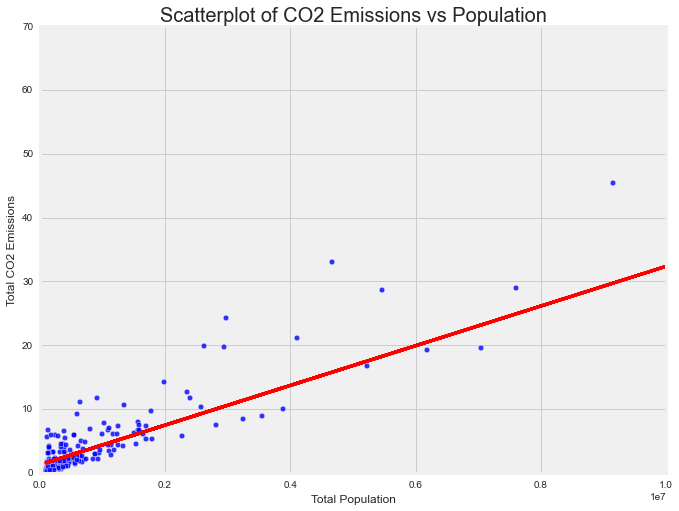

In [23]:
plt.figure(figsize=(10,8))
pl.scatter(data['TotalPopulation'], data['TotalEmissions'], alpha=.8, s=30)
pl.plot(data.TotalPopulation, model1.predict(), 'r', linewidth=3)
pl.title('Scatterplot of CO2 Emissions vs Population', fontsize=20)
pl.xlabel('Total Population')
pl.ylabel('Total CO2 Emissions')
pl.xlim([0, 1e7])
pl.ylim([0, 70])

In [24]:
# Create log
x = np.log10(data['TotalPopulation'])
y = np.log10(data['TotalEmissions'])

#print x, y
X = sm.add_constant(x)
#print X
model2 = sm.OLS(y, X, missing='drop')#.fit() # ignores entires where x or y is NaN
fit2 = model2.fit()
fit2.params[1], fit2.params[0] 

(0.92016931138037816, -4.87699978258191)

In [25]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TotalEmissions   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     726.7
Date:                Thu, 19 Nov 2015   Prob (F-statistic):           7.15e-77
Time:                        18:38:52   Log-Likelihood:                -20.542
No. Observations:                 259   AIC:                             45.08
Df Residuals:                     257   BIC:                             52.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const              -4.8770      0.191    -25.494      0.000        -5.254    -4.500
TotalPopulation     0.9202      0.034     26.958      0.000         0.853     0.987
==============================================================================
Omnibus:                       50.407   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.892
Skew:                           1.148   Prob(JB):                     2.01e-17
Kurtosis:                       4.363   Cond. No.                         67.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(-1, 2.5)

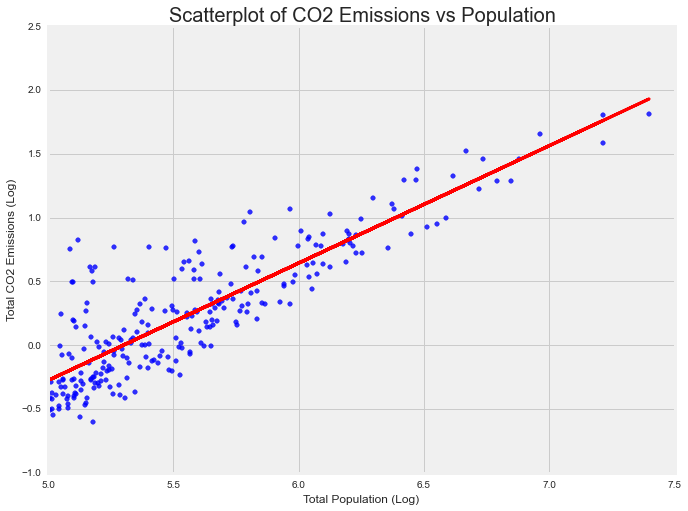

In [26]:
pl.figure(figsize=(10,8))
pl.scatter(x, y, color='b', alpha=.8, s=20)
pl.plot(x, fit2.predict(), color = 'r', linewidth=3)
pl.title('Scatterplot of CO2 Emissions vs Population', fontsize=20)
pl.xlabel('Total Population (Log)')
pl.ylabel('Total CO2 Emissions (Log)')
pl.xlim([5,7.5])
pl.ylim([-1,2.5])

In [27]:
plt.figure(figsize=(10,10))
pl.scatter(data['Total'],data['Total Population'], alpha=.5, s=20, color='b')
pl.title('Scatterplot of EUI Total vs Number of Units')
pl.xlabel('Number of Units')
pl.ylabel('EUI Total')


KeyError: 'Total'